In [2]:
import sys
!{sys.executable} -m pip install plotly

In [2]:
import plotly
print(plotly.__version__)

6.3.1


In [3]:
#-----------------------------------------------
# TREE PLANTING PREDICTION FOR TAMILNADU CITIES
#-----------------------------------------------

#importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px

In [4]:
# load dataset
df=pd.read_csv("Tamil_Nadu_Environmental_Dataset_Industrial.csv")
print(df)

           District  Latitude  Longitude  Human Population 2025  \
0          Ariyalur    8.8631    79.6347                 646793   
1      Chengalpattu    8.5645    77.6099                 791372   
2           Chennai   10.5371    77.7050                 619800   
3        Coimbatore   10.3971    77.7198                1133525   
4         Cuddalore   10.2893    79.4124                 376821   
5        Dharmapuri   10.6651    80.5645                1140664   
6          Dindigul   10.0587    78.6703                 460807   
7             Erode    8.3760    80.8577                1279518   
8      Kallakurichi   10.9160    78.8418                1100780   
9       Kanchipuram    9.7888    78.0294                 821858   
10    Kanniyakumari    8.5026    79.9602                 710075   
11            Karur   11.7340    79.6874                 630194   
12      Krishnagiri   11.8758    78.3392                 438067   
13          Madurai   10.2269    78.8119                 59786

In [5]:
#data preprocessing
priority_mapping = {"low":1, "medium":2, "high":3, "very high":4}
df["priority_score"] = df["Tree Planting Priority Score"].map(priority_mapping)

#create a numeric target-estimated trees needed to offset total pollution
df["trees_needed"] = ((df["Vehicle Pollution Index"]*10) + df["Industrial Pollution (tons/year)"])

In [ ]:
You have a column named "Tree Planting Priority Score" that contains text values such as "Low", "Medium", "High", "Very High".
Machine learning models work better with numbers than text.
So, you create a dictionary that converts these text labels into numeric values:
"low" → 1
"medium" → 2
"high" → 3
"very high" → 4
Higher numbers mean higher priority for tree planting

2.The .map() function replaces each text value in "Tree Planting Priority Score" with its numeric equivalent based on your dictionary.
A new column called "priority_score" is created that stores these numbers

3.You are estimating how many trees need to be planted in each city.
You assume that both vehicle and industrial pollution contribute to the need for more trees.
The formula combines both pollution factors:
Multiply the vehicle pollution index by 10 (to scale it up).
Add the industrial pollution (measured in tons/year).
The resulting value represents the total pollution impact in that city.
This becomes your target variable (trees_needed) that your model will learn to predict.


| Vehicle Pollution Index | Industrial Pollution (tons/year) | Tree Planting Priority Score |
| ----------------------- | -------------------------------- | ---------------------------- |
| 60                      | 150                              | High                         |
priority_score = 3
trees_needed = (60 * 10) + 150 = 750


In [6]:
#train model
features = ["Vehicle Pollution Index","Industrial Pollution (tons/year)","Green Cover %","priority_score"]
x=df[features]
y=df["trees_needed"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)



In [7]:
#train random forest model
model = RandomForestRegressor(n_estimators=120, random_state=42)
model.fit(x_train, y_train)

,n_estimators,120
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#n_estimators=120	            Number of trees in the forest. More trees can improve performance but increase computation.
#criterion='squared_error'	    Metric used to measure the quality of a split. 'squared_error' is standard for regression.
#max_depth=None	                No limit on tree depth. Trees grow until all leaves are pure or contain fewer than min_samples_split samples.
#min_samples_split=2	            Minimum number of samples required to split an internal node.
#min_weight_fraction_leaf=0.0	Minimum weighted fraction of the sum total of weights required to be at a leaf node.
#max_features=None	            Number of features to consider when looking for the best split. None means all features.
#max_leaf_nodes=None	            If set, trees will grow with at most this many leaf nodes.
#min_impurity_decrease=0.0	    A node will be split if this split induces a decrease in impurity greater than or equal to this value.
#bootstrap=True	                Whether bootstrap samples are used when building trees.
#oob_score=False	                Whether to use out-of-bag samples to estimate the generalization accuracy.
#n_jobs=None	                    Number of jobs to run in parallel. None means 1; -1 means use all processors.
#random_state=42	                Seed for reproducibility.
#verbose=0	                    Controls verbosity of output.
#warm_start=False	            If True, reuse the solution of the previous call to fit and add more estimators.
#ccp_alpha=0.0	                Complexity parameter used for Minimal Cost-Complexity Pruning.
#max_samples=None	            If bootstrap is True, this sets the number of samples to draw from X to train each tree.
#Qmonotonic_cst=None	            Used for monotonic constraints (experimental feature)

In [8]:
#predictions
df["predicted_trees"] = model.predict(x).round().astype(int)
#sort by highest
df_sorted = df.sort_values("predicted_trees",ascending=False)
print("\n number of trees to be planted in each city:\n")
print(df_sorted[["District","predicted_trees"]])
print(df_sorted[["District","predicted_trees"]].head(10))


 number of trees to be planted in each city:

           District  predicted_trees
29  Tiruchirappalli              961
7             Erode              939
13          Madurai              856
3        Coimbatore              855
21            Salem              850
28      Thoothukudi              820
18      Pudukkottai              787
25            Theni              787
26      Thiruvallur              772
20          Ranipet              772
37   Mayiladuthurai              756
8      Kallakurichi              755
5        Dharmapuri              750
33          Vellore              749
30      Tirunelveli              740
31         Tiruppur              736
2           Chennai              732
36         Karaikal              728
0          Ariyalur              717
32   Tiruvannamalai              683
23          Tenkasi              652
15         Namakkal              651
6          Dindigul              650
35     Virudhunagar              641
34       Villupuram         

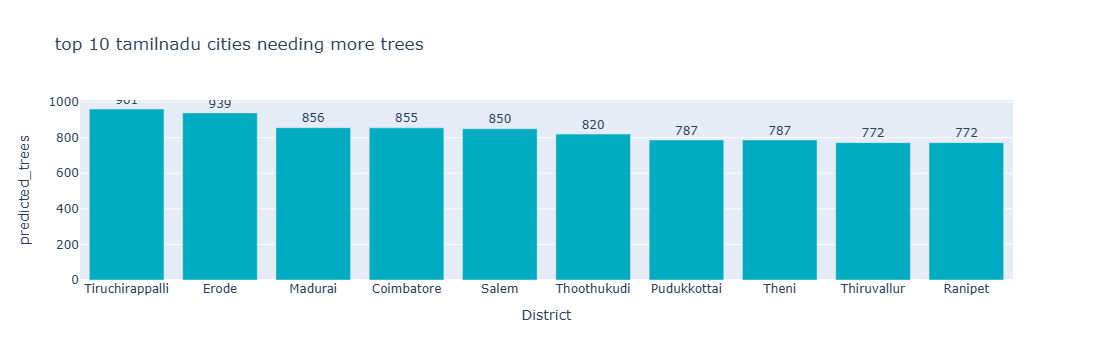

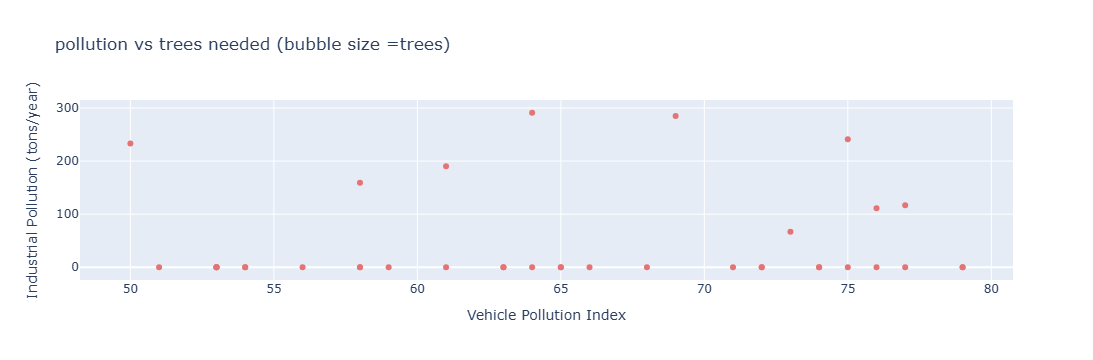

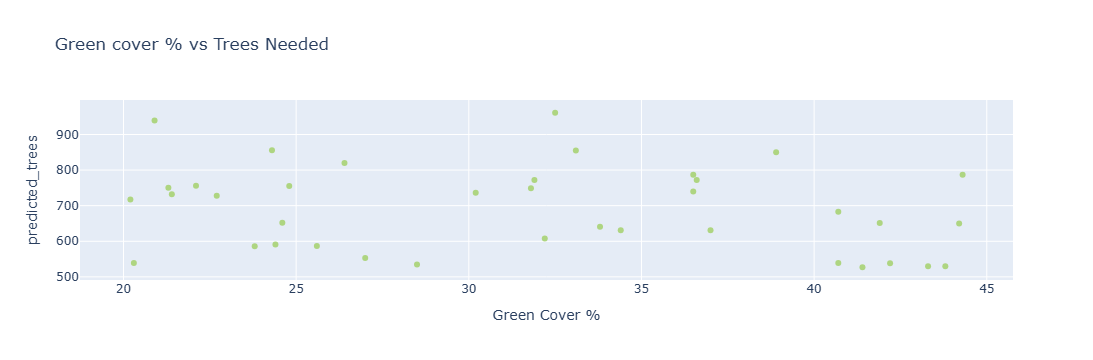

In [25]:
#visualization
#bar chart
a=px.bar(
    df_sorted.head(10),
    x = "District",
    y = "predicted_trees",
    color = "priority_score",
    title = "top 10 tamilnadu cities needing more trees",
    text = "predicted_trees"
)
a.update_traces(textposition = "outside")
a.update_traces(marker_color = "#00acc1")
a.show()

#scatter - pollution vs trees
b = px.scatter(
    df,
    x = "Vehicle Pollution Index",
    y = "Industrial Pollution (tons/year)",
    color = "priority_score",
    hover_name = "District",
    title = "pollution vs trees needed (bubble size =trees)"
)
b.update_traces(marker_color = "#e57373")
b.show()

#green cover vs predicted trees
c = px.scatter(
    df,
    x = "Green Cover %",
    y = "predicted_trees",
    color = "priority_score",
    hover_name = "District",
    title = "Green cover % vs Trees Needed"
)
c.update_traces(marker_color = "#aed581")
c.show()

In [20]:
'''why plotly?
ploty is a open source python libraries used to create  interactive,high quality data visualizations like charts,graphs and dashboard
hover over points to see values
zoom in/out  and pan across charts
basic charts:line,scatter,pie,bar
scientific plots:contour,histograms,ternary plots'''

'why plotly?\nploty is a open source python libraries used to create  interactive,high quality data visualizations like charts,graphs and dashboard\nhover over points to see values\nzoom in/out  and pan across charts\nbasic charts:line,scatter,pie,bar\nscientific plots:contour,histograms,ternary plots'

In [44]:
#insights
most_need = df_sorted.iloc[0]
least_need = df_sorted.iloc[-1]
print(f"\n City needing more number of trees: {most_need["District"]} ({most_need['predicted_trees']} trees)")
print(f" City needing least number of trees: {least_need["District"]} ({least_need['predicted_trees']} trees)")



 City needing more number of trees: Tiruchirappalli (961 trees)
 City needing least number of trees: Karur (527 trees)


In [45]:
import geopandas as gpd

In [46]:
#--------------
#Load geojson 
#--------------

import geopandas as gpd
gdf = gpd.read_file("tamilnadu_districts.geojson")
print(gdf.columns)
print(gdf.head())


Index(['OBJECTID', 'STNAME', 'DTNAME', 'DIST_HQ', 'STATE_HQ', 'STCODE11',
       'DTCODE11', 'YEAR_STAT', 'DIST_HQNM', 'Dist_LGD', 'LOC_STAT_1',
       'LOC_NAME', 'geometry'],
      dtype='object')
   OBJECTID      STNAME          DTNAME         DIST_HQ  STATE_HQ STCODE11  \
0        69  TAMIL NADU     Thiruvallur      Tiruvallur         0       33   
1        85  TAMIL NADU  Tiruvannamalai  Tiruvannamalai         0       33   
2        87  TAMIL NADU        Namakkal        Namakkal         0       33   
3        88  TAMIL NADU           Karur           Karur         0       33   
4        89  TAMIL NADU      Viluppuram      Viluppuram         0       33   

  DTCODE11 YEAR_STAT       DIST_HQNM  Dist_LGD   LOC_STAT_1        LOC_NAME  \
0      602    2011_c      Tiruvallur       589  District Hq     Thiruvallur   
1      606    2011_c  Tiruvannamalai       593  District Hq  Tiruvannamalai   
2      609    2011_c        Namakkal       580  District Hq        Namakkal   
3      613    20

In [48]:
import geopandas as gpd

# Load the GeoJSON file
gdf = gpd.read_file("tamilnadu_districts.geojson")         # gdf = geo dataframe

# Display available columns
print(gdf.columns)

# Merge District and State name columns
gdf["District_State"] = gdf["DTNAME"] + ", " + gdf["STNAME"]

# Show the first few rows
print(gdf[["DTNAME", "STNAME", "District_State"]].head())


Index(['OBJECTID', 'STNAME', 'DTNAME', 'DIST_HQ', 'STATE_HQ', 'STCODE11',
       'DTCODE11', 'YEAR_STAT', 'DIST_HQNM', 'Dist_LGD', 'LOC_STAT_1',
       'LOC_NAME', 'geometry'],
      dtype='object')
           DTNAME      STNAME              District_State
0     Thiruvallur  TAMIL NADU     Thiruvallur, TAMIL NADU
1  Tiruvannamalai  TAMIL NADU  Tiruvannamalai, TAMIL NADU
2        Namakkal  TAMIL NADU        Namakkal, TAMIL NADU
3           Karur  TAMIL NADU           Karur, TAMIL NADU
4      Viluppuram  TAMIL NADU      Viluppuram, TAMIL NADU


In [54]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON
gdf = gpd.read_file("tamilnadu_districts.geojson")

# Load your CSV dataset
df = pd.read_csv("Tamil_Nadu_Environmental_Dataset_Industrial.csv")

print("GeoJSON Columns:", gdf.columns)
print("CSV Columns:", df.columns)
# Convert names to lowercase and remove spaces
gdf["district"] = gdf["DTNAME"].str.lower().str.strip()
df["district"] = df["District"].str.lower().str.strip()
merged = gdf.merge(df, on="district", how="left")
print("✅ Merge successful! Total merged rows:", len(merged))

GeoJSON Columns: Index(['OBJECTID', 'STNAME', 'DTNAME', 'DIST_HQ', 'STATE_HQ', 'STCODE11',
       'DTCODE11', 'YEAR_STAT', 'DIST_HQNM', 'Dist_LGD', 'LOC_STAT_1',
       'LOC_NAME', 'geometry'],
      dtype='object')
CSV Columns: Index(['District', 'Latitude', 'Longitude', 'Human Population 2025',
       'Vehicle Pollution Index', 'Pollution Offset Ratio',
       'Tree Planting Priority Score', 'Green Cover %',
       'Recommended Tree Species', 'Estimated CO2 Absorption (tons/tree/year)',
       'Tree Planting Cost (₹)', 'Projected Pollution Reduction (tons/year)',
       'Industrial City', 'Industrial Pollution (tons/year)'],
      dtype='object')
✅ Merge successful! Total merged rows: 32


Available columns:
 Index(['District', 'Latitude', 'Longitude', 'Human Population 2025',
       'Vehicle Pollution Index', 'Pollution Offset Ratio',
       'Tree Planting Priority Score', 'Green Cover %',
       'Recommended Tree Species', 'Estimated CO2 Absorption (tons/tree/year)',
       'Tree Planting Cost (₹)', 'Projected Pollution Reduction (tons/year)',
       'Industrial City', 'Industrial Pollution (tons/year)'],
      dtype='object')


C:\Users\amrit\AppData\Local\Temp\ipykernel_25752\2432924545.py:15: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



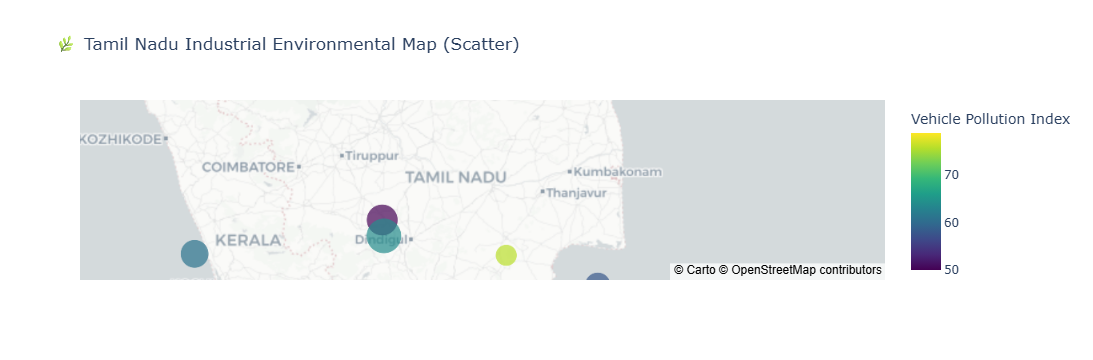

In [63]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv("Tamil_Nadu_Environmental_Dataset_Industrial.csv")

# Check column names to make sure we use the right ones
print("Available columns:\n", df.columns)

# If your coordinate columns are named differently (like 'lat', 'lon'), rename them
# Example: 
df.rename(columns={"lat": "Latitude", "lon": "Longitude"}, inplace=True)

# Scatter Mapbox visualization
fig = px.scatter_mapbox(
    df,
    lat="Latitude",                            # latitude column
    lon="Longitude",                           # longitude column
    color="Vehicle Pollution Index",           # choose a valid numeric or categorical column
    size="Industrial Pollution (tons/year)",   # numeric column for bubble size
    hover_name="District",
    hover_data={
        "Green Cover %": True,
        "Vehicle Pollution Index": True,
        "Industrial Pollution (tons/year)": True
    },
    color_continuous_scale="Viridis",          # try 'Turbo', 'Plasma', 'YlOrRd', 'Bluered'
    size_max=25,
    zoom=6.3,
    center={"lat": 10.8, "lon": 78.6},         # center on Tamil Nadu
    mapbox_style="carto-positron",
    title="🌿 Tamil Nadu Industrial Environmental Map (Scatter)"
)

fig.show()
